In [22]:
from datasets.process_dataset import process_dataset
data = process_dataset("datasets/trains.txt")

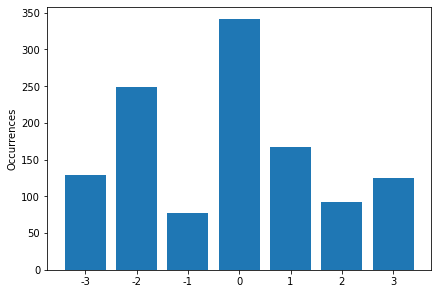

In [16]:
import numpy as np
import matplotlib.pyplot as plt

classes = {}
for t in data:
    classes[t.intensity] =  classes.get(t.intensity, 0) + 1

objects = sorted(classes.keys())
y_pos = np.arange(len(objects))
values = list(map(lambda key: classes[key], objects))

plt.bar(y_pos, values)
plt.xticks(y_pos, objects)
plt.ylabel('Occurrences')
plt.tight_layout(0.4)
plt.savefig('intensity_analysis.png')
plt.show()

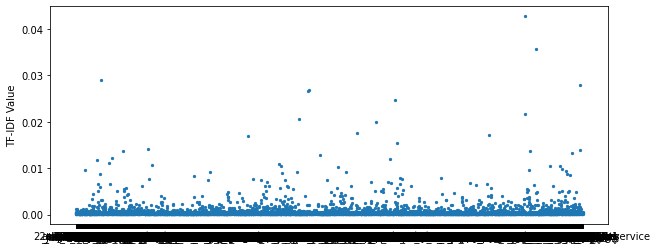

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = map(lambda x: x.tweet, data)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(corpus)

tfidf_mean = tfidf_vectorizer_vectors.mean(axis=0).tolist()[0]

# get the first vector out (for the first document)

# place tf-idf values in a pandas data frame
plt.figure(figsize=(10,4))
plt.scatter(tfidf_vectorizer.get_feature_names(), tfidf_mean, s=5)
plt.ylabel('TF-IDF Value')
plt.savefig('tf_idf.png')
plt.show()

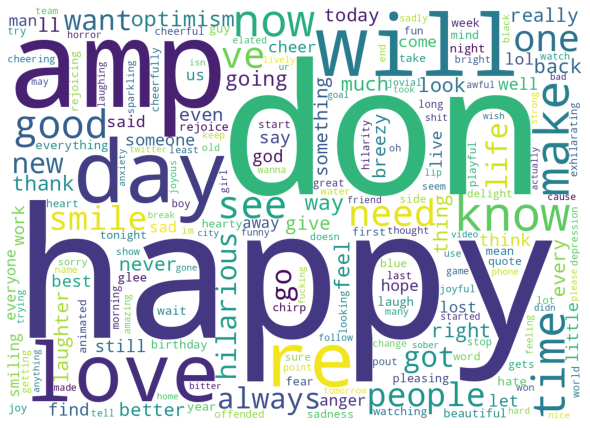

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

corpus = map(lambda x: x.tweet, data)
count_vectorizer = CountVectorizer()
count_vectorizer_vectors = count_vectorizer.fit_transform(corpus)
word_count = count_vectorizer_vectors.sum(axis=0).tolist()[0]

features = count_vectorizer.get_feature_names()
cloud_words = ""
for i in range(0, len(word_count)):
    for _ in range(0, word_count[i]):
        cloud_words += features[i] + " "

wordcloud = WordCloud(width=1280, height=920, background_color='white', stopwords=STOPWORDS, collocations=False).generate(cloud_words)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('wordcloud.png')
plt.show()

In [25]:
from pipelines.basic import basic_pipeline
from sklearn.metrics import classification_report
from datasets.process_dataset import get_dataset
from sklearn.model_selection import train_test_split


x, y = get_dataset(data)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = basic_pipeline(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -3       0.35      0.21      0.27        28
          -2       0.21      0.33      0.26        45
          -1       0.10      0.05      0.06        21
           0       0.32      0.36      0.34        75
           1       0.17      0.13      0.15        30
           2       0.06      0.08      0.07        12
           3       0.41      0.27      0.33        26

    accuracy                           0.26       237
   macro avg       0.23      0.21      0.21       237
weighted avg       0.26      0.26      0.25       237

